<h1>Starter Kernel: Unemployment in EU Countries</h1>

<a id='0'>Content</a>

- <a href='#1'>Introduction</a>   
- <a href='#2'>Data Preparation</a>   
- <a href='#3'>Extract country, age, unit, sex, s_adj data</a>   
- <a href='#4'>Filter columns for analysis</a>   
- <a href='#5'>Data Visualization</a>   




## <a id='1'>Introduction</a>  


We analyze here the unemployment in EU in recent years. The full data (~1983 - 2020) is grouped on country, sex, age interval (<25, 25-74, total).

The dataset used is migrated from [EU Open Data Portal](https://data.europa.eu/euodp/en/data/dataset).

I also use a dataset with ISO codes for countries.

In this Kernel, we show how we can extract information from this compact dataset and mix it with countries data.


<img src="https://images1.westword.com/imager/u/original/11728086/unemployment.line.1938.unsplash.jpg"></img>





## <a id='2'> Data preparation</a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import folium
from folium.plugins import HeatMap, HeatMapWithTime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

The unemployment data is in TSV (tab separated format). We use `read_csv` with `\t` separator for reading the data.

In [2]:
data_df = pd.read_csv(os.path.join("/kaggle", "input", "unemployment-in-european-union", "une_rt_m.tsv"), sep='\t')

The countries codes data is provided in *.csv format.

In [3]:
country_codes_df = pd.read_csv(os.path.join("/kaggle", "input", "iso-country-codes-global", "wikipedia-iso-country-codes.csv"))

Let's first glimpse the data.

In [4]:
data_df.shape

(2131, 452)

In [5]:
data_df.head()

,"s_adj,age,unit,sex,geo\time",2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,...,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,"NSA,TOTAL,PC_ACT,F,AT",6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,...,:,:,:,:,:,:,:,:,:,:
1,"NSA,TOTAL,PC_ACT,F,BE",5.4,5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,...,:,:,:,:,:,:,:,:,:,:
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,...,:,:,:,:,:,:,:,:,:,:
3,"NSA,TOTAL,PC_ACT,F,CH",:,4.4,4.3,4.4,4.6,4.6,4.5,4.1,4.0,...,:,:,:,:,:,:,:,:,:,:
4,"NSA,TOTAL,PC_ACT,F,CY",7.2,6.6,6.4,6.8,7.1,7.5,7.9,7.5,7.7,...,:,:,:,:,:,:,:,:,:,:


We look as well to the data columns.

In [6]:
data_df.columns

Index(['s_adj,age,unit,sex,geo\time', '2020M07 ', '2020M06 ', '2020M05 ',
       '2020M04 ', '2020M03 ', '2020M02 ', '2020M01 ', '2019M12 ', '2019M11 ',
       ...
       '1983M10 ', '1983M09 ', '1983M08 ', '1983M07 ', '1983M06 ', '1983M05 ',
       '1983M04 ', '1983M03 ', '1983M02 ', '1983M01 '],
      dtype='object', length=452)

Typically time series data in EU Open Data Portal are stored with separate columns for each time value. We will have to pivot these columns during our data processing.

Let's also look to the country codes.

In [7]:
country_codes_df.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


Let's replace the column names.

In [8]:
country_codes_df.columns = ['country', 'C2', 'C3', 'numeric', 'iso']

In [9]:
country_codes_df.head()

,country,C2,C3,numeric,iso
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


## <a id='3'>Extract country, age, unit, sex, s_adj data</a>


We separate from the first column the various data attributes (country, age, unit, sex, s_adj) by spliting the complex data in individual values and we store them on separate columns.

In [10]:
data_df['C2'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[-1])
data_df['age'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[1])
data_df['unit'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[2])
data_df['sex'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[3])
data_df['s_adj'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[0])

Let's check again the transformed data.

In [11]:
data_df.head()

,"s_adj,age,unit,sex,geo\time",2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,...,1983M05,1983M04,1983M03,1983M02,1983M01,C2,age,unit,sex,s_adj
0,"NSA,TOTAL,PC_ACT,F,AT",6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,...,:,:,:,:,:,AT,TOTAL,PC_ACT,F,NSA
1,"NSA,TOTAL,PC_ACT,F,BE",5.4,5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,...,:,:,:,:,:,BE,TOTAL,PC_ACT,F,NSA
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,...,:,:,:,:,:,BG,TOTAL,PC_ACT,F,NSA
3,"NSA,TOTAL,PC_ACT,F,CH",:,4.4,4.3,4.4,4.6,4.6,4.5,4.1,4.0,...,:,:,:,:,:,CH,TOTAL,PC_ACT,F,NSA
4,"NSA,TOTAL,PC_ACT,F,CY",7.2,6.6,6.4,6.8,7.1,7.5,7.9,7.5,7.7,...,:,:,:,:,:,CY,TOTAL,PC_ACT,F,NSA


In [12]:
print(f"countries:\n{list(data_df.C2.unique())}")

countries:
['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA18', 'EA19', 'EE', 'EL', 'ES', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'JP', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK', 'US', 'TR']


In [13]:
print(f"sex:\n{list(data_df.sex.unique())}")

sex:
['F', 'M', 'T']


In [14]:
print(f"age intervals:\n{list(data_df.age.unique())}")

age intervals:
['TOTAL', 'Y25-74', 'Y_LT25']


In [15]:
print(f"unit:\n{list(data_df.unit.unique())}")

unit:
['PC_ACT', 'THS_PER']


In [16]:
print(f"s_adj:\n{list(data_df.s_adj.unique())}")

s_adj:
['NSA', 'SA', 'TC']


## <a id='4'>Filter columns for analysis</a>


We select only a part of columns for further analysis.

More specificaly, we are selecting country code (2 letters), age, unit, sex, s_adj and months from Jan 2015 to June 2020.

In [17]:
selected_cols = ['C2','age','unit','sex', 's_adj', 
                 '2020M07 ', '2020M06 ', '2020M05 ', '2020M04 ','2020M03 ','2020M02 ','2020M01 ',
                 '2019M12 ','2019M11 ','2019M10 ','2019M09 ','2019M08 ','2019M07 ',
                 '2019M06 ','2019M05 ','2019M04 ','2019M03 ','2019M02 ','2019M01 ',
                '2018M12 ','2018M11 ','2018M10 ','2018M09 ','2018M08 ','2018M07 ',
                 '2018M06 ','2018M05 ','2018M04 ','2018M03 ','2018M02 ','2018M01 ',
                '2017M12 ','2017M11 ','2017M10 ','2017M09 ','2017M08 ','2017M07 ',
                 '2017M06 ','2017M05 ','2017M04 ','2017M03 ','2017M02 ','2017M01 ',
                '2016M12 ','2016M11 ','2016M10 ','2016M09 ','2016M08 ','2016M07 ',
                 '2016M06 ','2016M05 ','2016M04 ','2016M03 ','2016M02 ','2016M01 ',
                '2015M12 ','2015M11 ','2015M10 ','2015M09 ','2015M08 ','2015M07 ',
                 '2015M06 ','2015M05 ','2015M04 ','2015M03 ','2015M02 ','2015M01 ']

In [18]:
data_sel_df = data_df[selected_cols]

Let's also merge with the country codes.

In [19]:
data_sel_df = data_sel_df.merge(country_codes_df, on="C2")

In [20]:
data_sel_df.head()

,C2,age,unit,sex,s_adj,2020M07,2020M06,2020M05,2020M04,2020M03,...,2015M06,2015M05,2015M04,2015M03,2015M02,2015M01,country,C3,numeric,iso
0,AT,TOTAL,PC_ACT,F,NSA,6.0,6.2,5.2,4.9,4.7,...,5.2,5.6,5.4,5.2,5.6,5.2,Austria,AUT,40,ISO 3166-2:AT
1,AT,TOTAL,PC_ACT,M,NSA,5.5,6.2,6.1,5.2,5.0,...,6.0,6.1,6.6,6.6,6.2,6.0,Austria,AUT,40,ISO 3166-2:AT
2,AT,TOTAL,PC_ACT,T,NSA,5.7,6.2,5.7,5.1,4.9,...,5.6,5.8,6.0,5.9,5.9,5.6,Austria,AUT,40,ISO 3166-2:AT
3,AT,TOTAL,THS_PER,F,NSA,129,132,108,100,97,...,106,114,109,105,113,106,Austria,AUT,40,ISO 3166-2:AT
4,AT,TOTAL,THS_PER,M,NSA,134,149,144,121,118,...,141,140,152,151,141,136,Austria,AUT,40,ISO 3166-2:AT


Let's look to the data we selected.

In [21]:
print(f"selected data shape: {data_sel_df.shape}")

selected data shape: (1645, 76)


### Pivot time series data using `melt`

We are using `melt` to pivot time series columns. Now for each value of time series we introduce additional rows.

In [22]:
data_tr_df = data_sel_df.melt(id_vars=["country", "age", "unit", "sex", "s_adj", "C2", "C3", "numeric", "iso"], 
        var_name="Date", 
        value_name="Value")

Let's check the resulted data structure.

In [23]:
data_tr_df.head()

,country,age,unit,sex,s_adj,C2,C3,numeric,iso,Date,Value
0,Austria,TOTAL,PC_ACT,F,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,6.0
1,Austria,TOTAL,PC_ACT,M,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,5.5
2,Austria,TOTAL,PC_ACT,T,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,5.7
3,Austria,TOTAL,THS_PER,F,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,129
4,Austria,TOTAL,THS_PER,M,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,134


In [24]:
print(f"new data shape: {data_tr_df.shape}")

new data shape: (110215, 11)


### Clean the time series data


We do some cleaning on the time series data. We simply filter non-digit data and trim spaces.

In [25]:
import re
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: re.sub(r"[a-zA-Z: ]", "", x))
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: x.replace(" ",""))

data_tr_df = data_tr_df.loc[~(data_tr_df.Value=="")]

data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: float(x))

Let's check the results.

In [26]:
print(f"distinct values: {len(list(data_tr_df['Value'].unique()))}")
print(f"samples values: {data_tr_df['Value'].unique()}")

distinct values: 3948
samples values: [6.000e+00 5.500e+00 5.700e+00 ... 3.346e+03 6.243e+03 3.259e+03]


## <a id='5'>Data visualization</a>

We look to total values for age interval 25-74.

In [27]:
total_y25_74_df = data_tr_df.loc[(data_tr_df.age=='Y25-74')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='T')&(data_tr_df.s_adj=='TC')]

In [28]:
def plot_time_variation(df, y='Value', size=1, is_log=False, title=""):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))

    countries = list(df.country.unique())
    for country in countries:
        df_ = df[(df['country']==country)] 
        g = sns.lineplot(x="Date", y=y, data=df_,  label=country)  
        ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.xticks(rotation=90)
    plt.title(f'Total unemployment, {title}, grouped by country')
    ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  


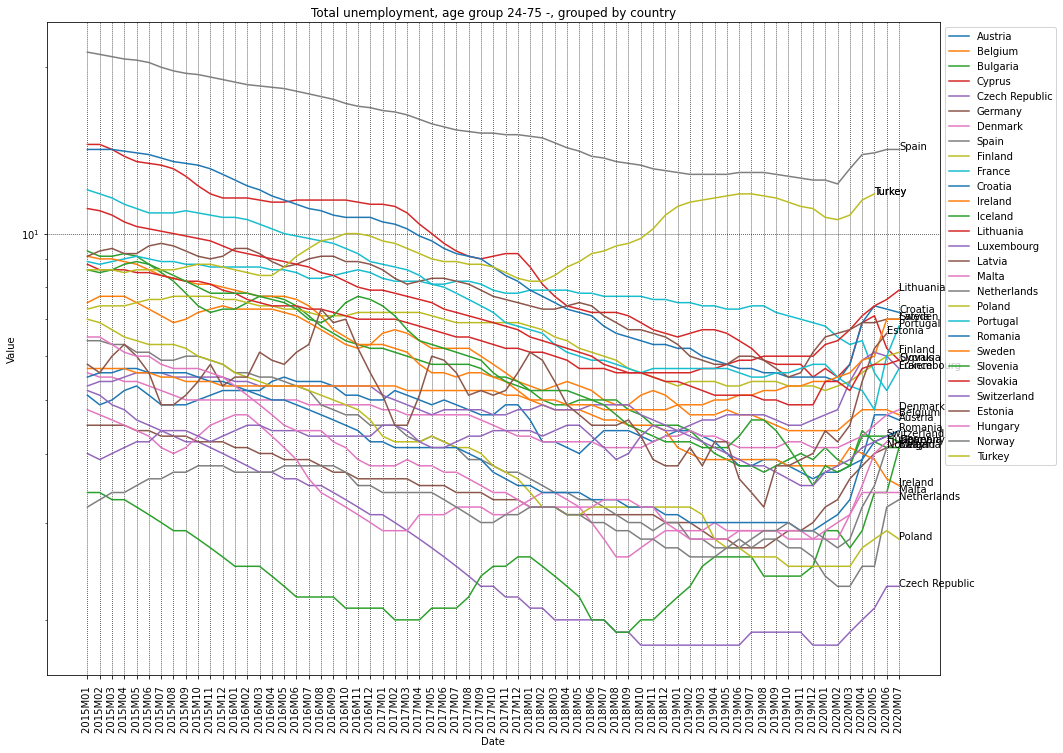

In [29]:
plot_time_variation(total_y25_74_df, size=4, is_log=True, title = "age group 24-75 -")

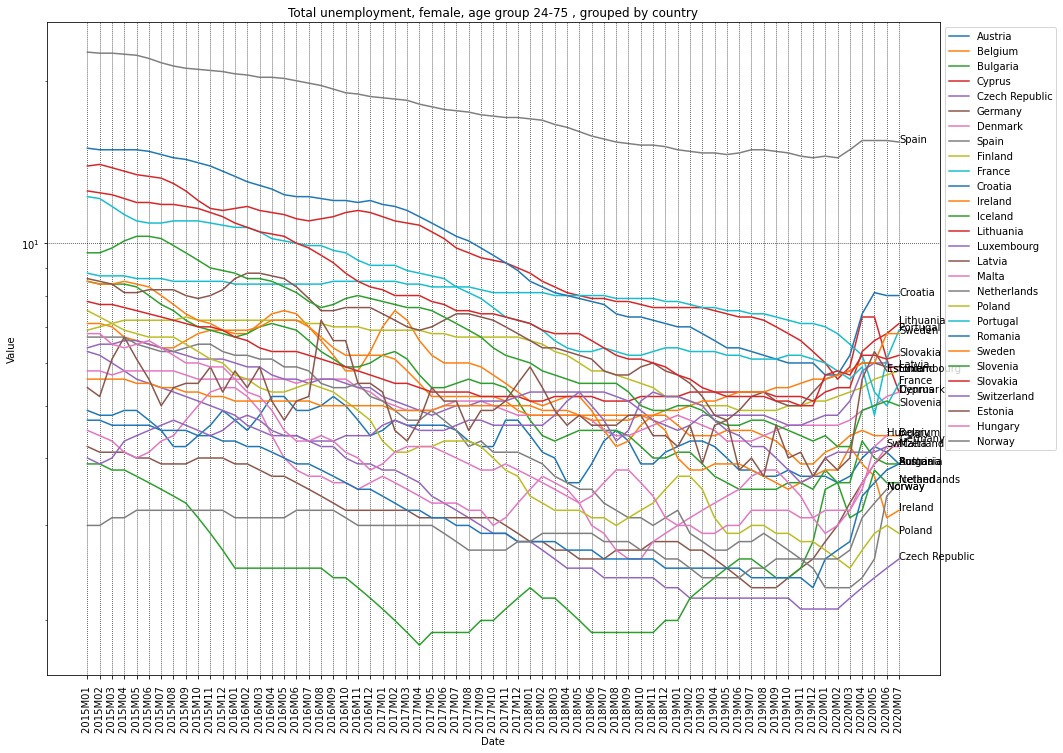

In [30]:
total_F_y25_74_df = data_tr_df.loc[(data_tr_df.age=='Y25-74')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='F')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_F_y25_74_df, size=4, is_log=True, title = "female, age group 24-75 ")

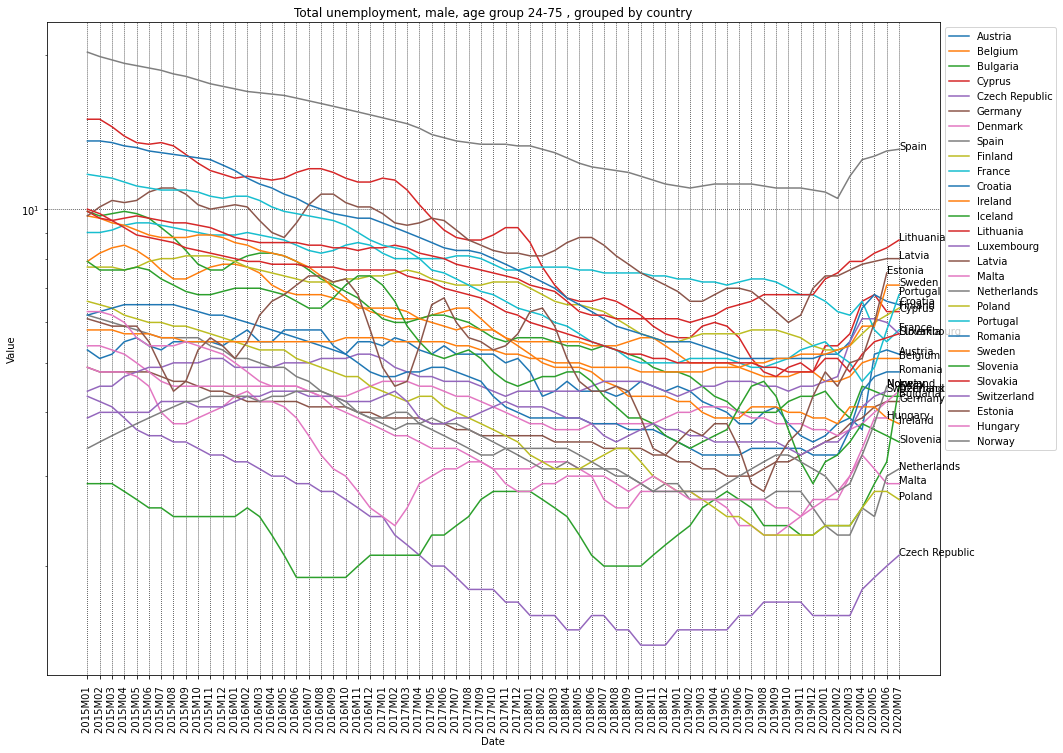

In [31]:
total_M_y25_74_df = data_tr_df.loc[(data_tr_df.age=='Y25-74')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='M')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_M_y25_74_df, size=4, is_log=True, title = "male, age group 24-75 ")

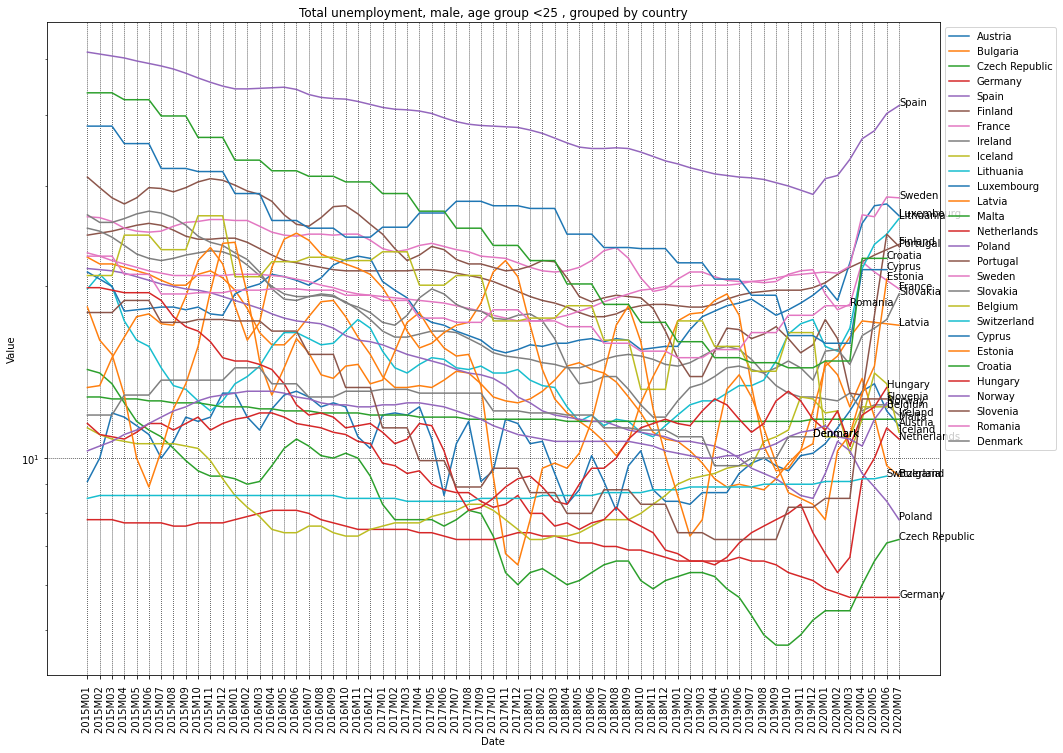

In [32]:
total_M_y25_df = data_tr_df.loc[(data_tr_df.age=='Y_LT25')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='M')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_M_y25_df, size=4, is_log=True, title = "male, age group <25 ")

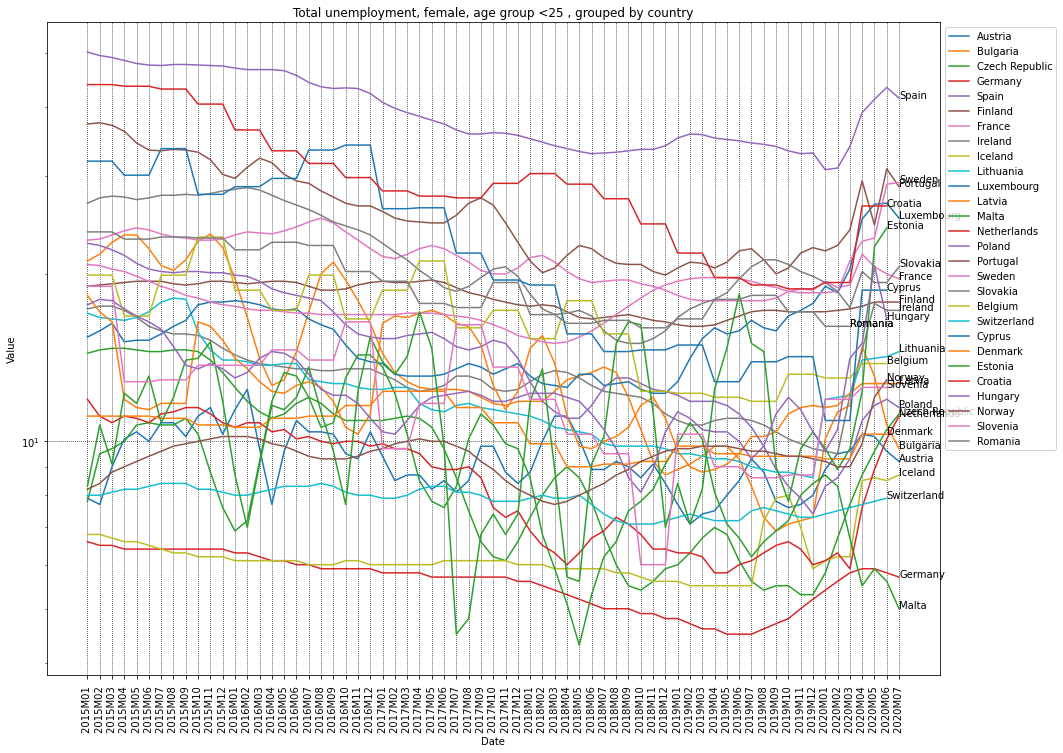

In [33]:
total_F_y25_df = data_tr_df.loc[(data_tr_df.age=='Y_LT25')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='F')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_F_y25_df, size=4, is_log=True, title = "female, age group <25 ")

### Compare age group, sex / country

In [34]:
def plot_time_variation_age_sex(data_tr_df, y='Value', country="Netherlands"):
    c_df = data_tr_df.loc[(data_tr_df.country==country)&(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
    f, ax = plt.subplots(1,1, figsize=(16,12))
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='F')],  label="Female, <25y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='M')],  label="Male, <25y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='F')],  label="Female, 25-74y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='M')],  label="Male, <25-74y")  

    plt.xticks(rotation=90)
    plt.title(f'Total unemployment in {country}, grouped by age & sex')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

Let's look to some specific countries evolution.

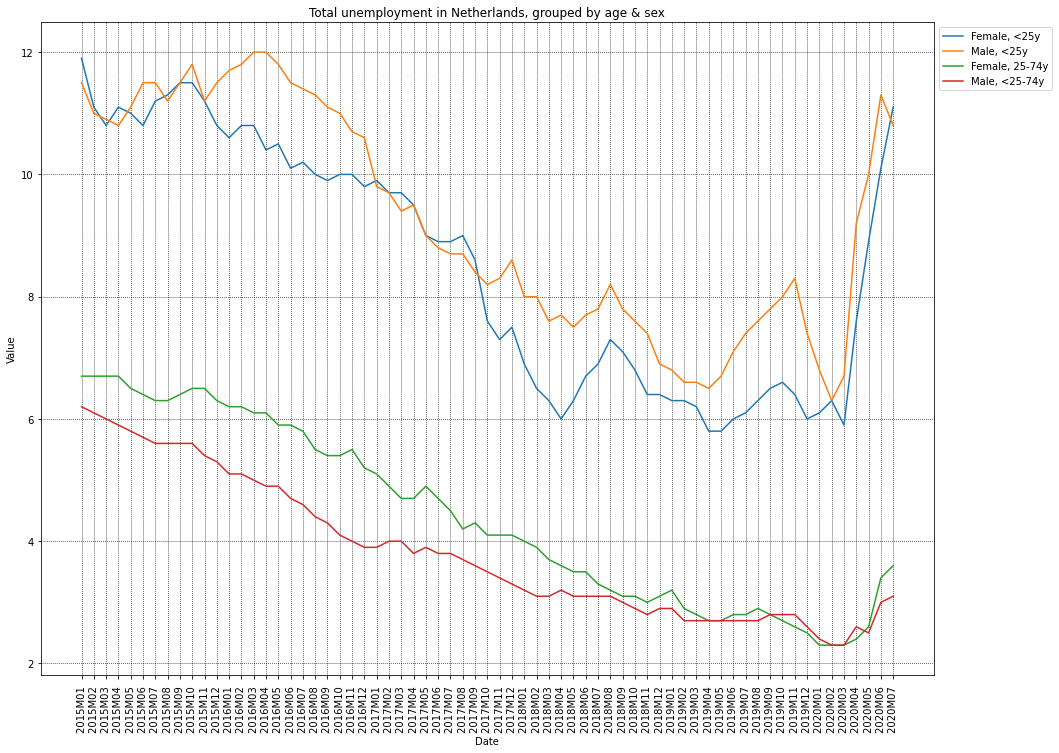

In [35]:
plot_time_variation_age_sex(data_tr_df,country="Netherlands")

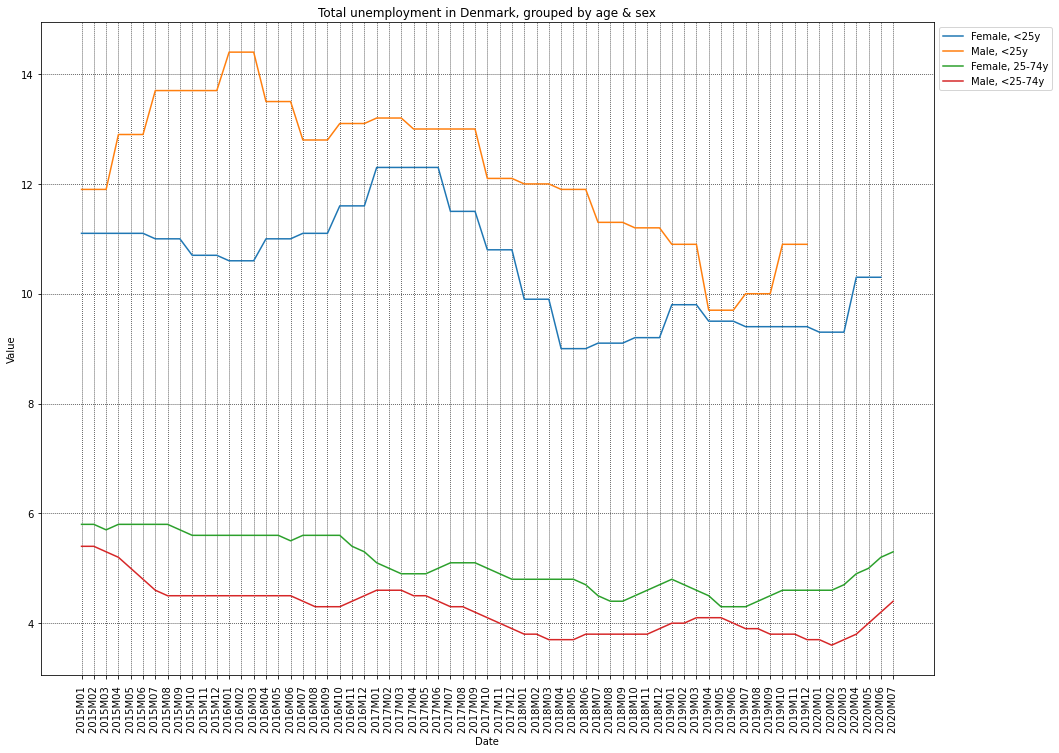

In [36]:
plot_time_variation_age_sex(data_tr_df,country="Denmark")

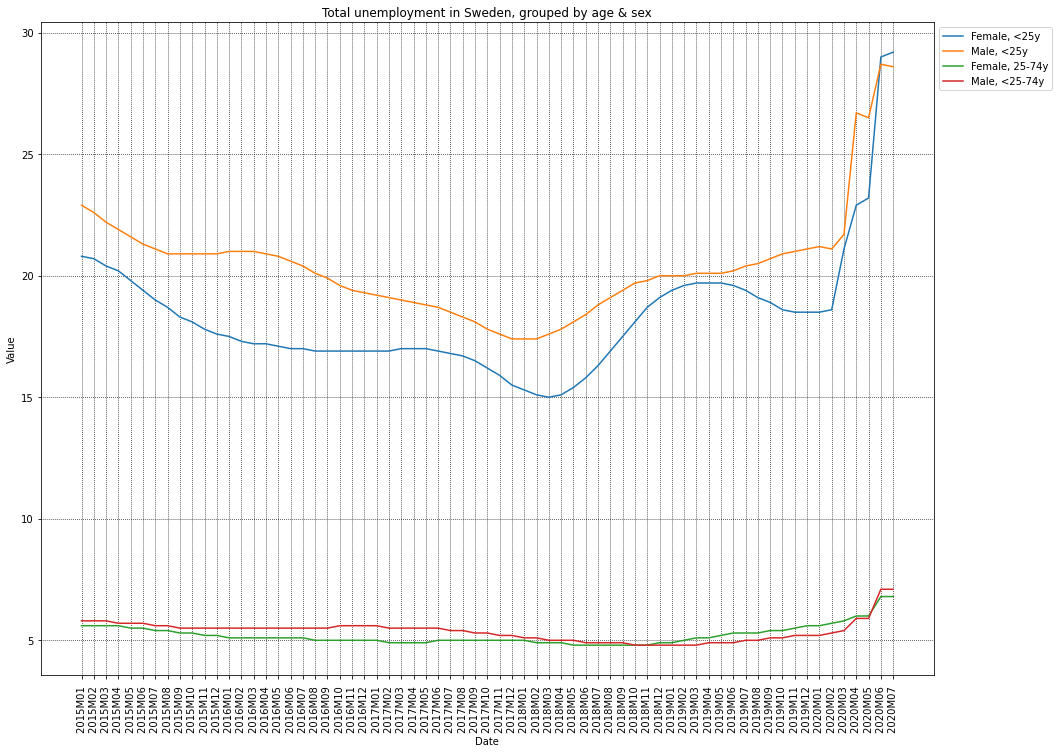

In [37]:
plot_time_variation_age_sex(data_tr_df,country="Sweden")

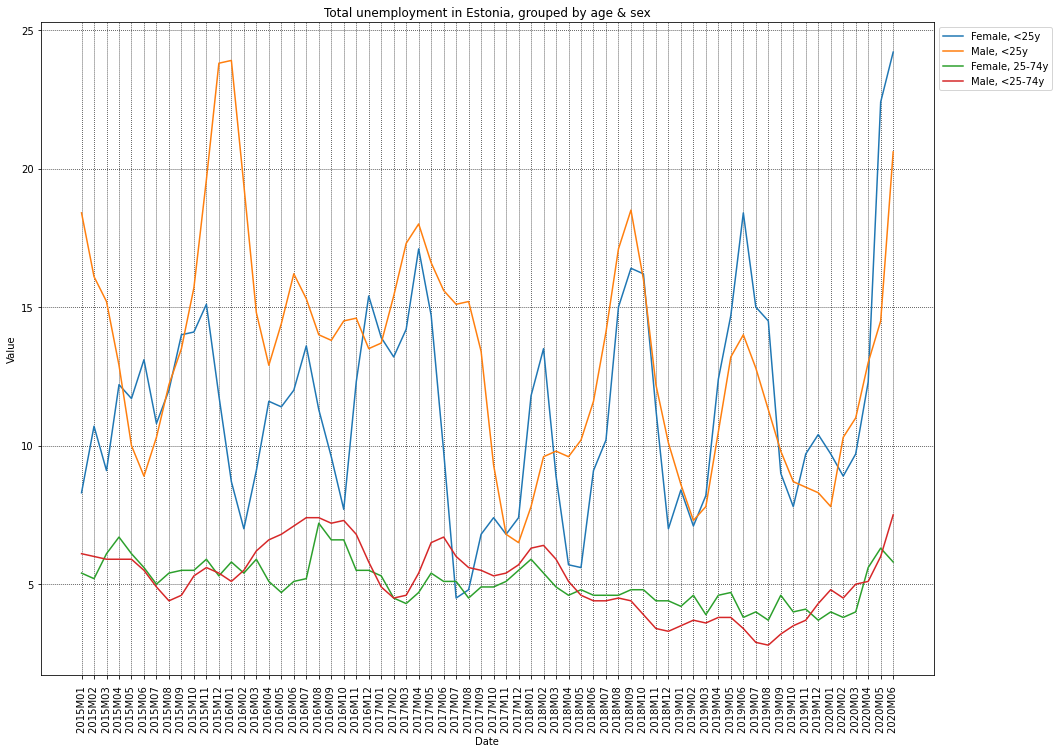

In [38]:
plot_time_variation_age_sex(data_tr_df,country="Estonia")

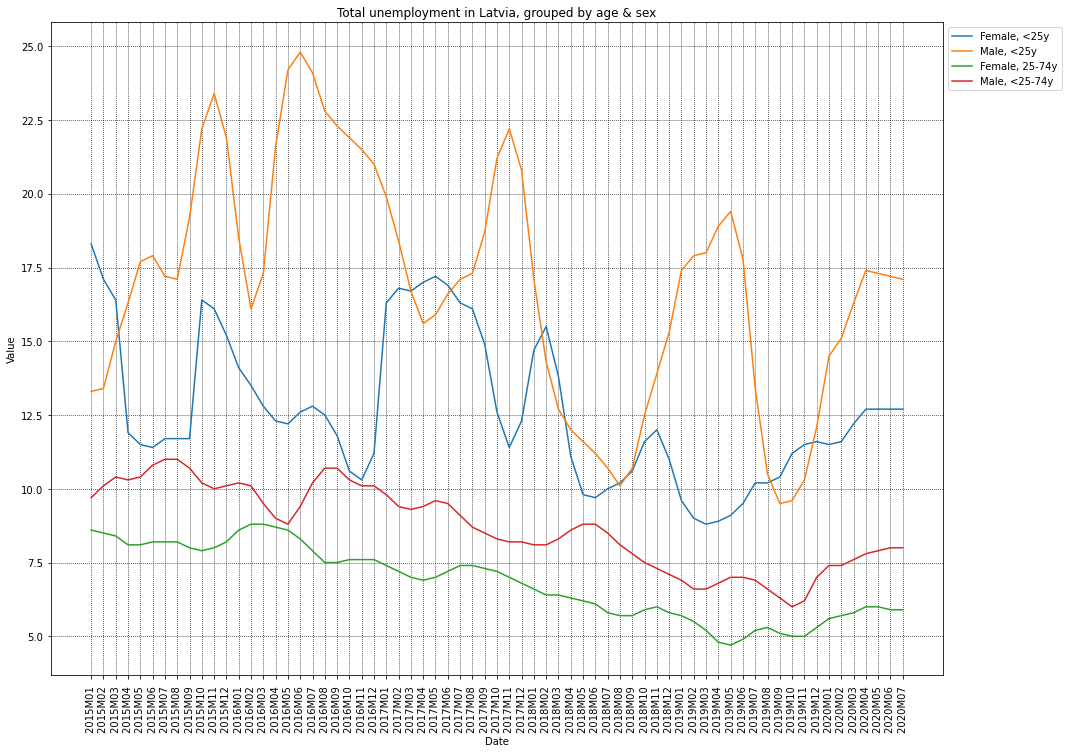

In [39]:
plot_time_variation_age_sex(data_tr_df,country="Latvia")

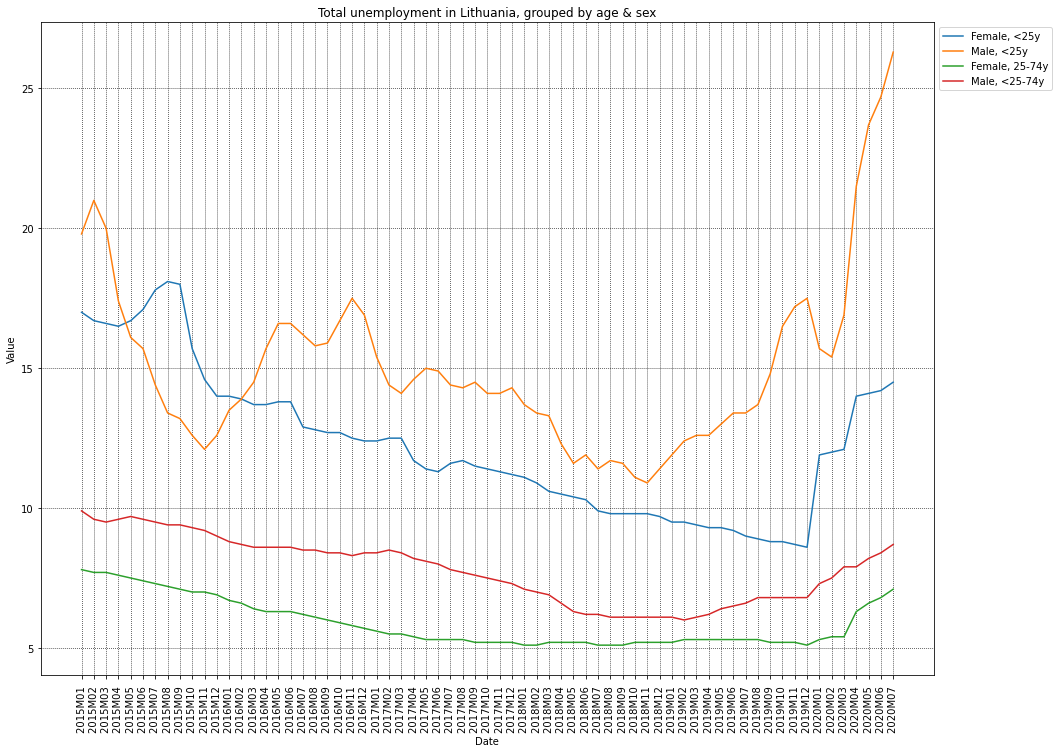

In [40]:
plot_time_variation_age_sex(data_tr_df,country="Lithuania")

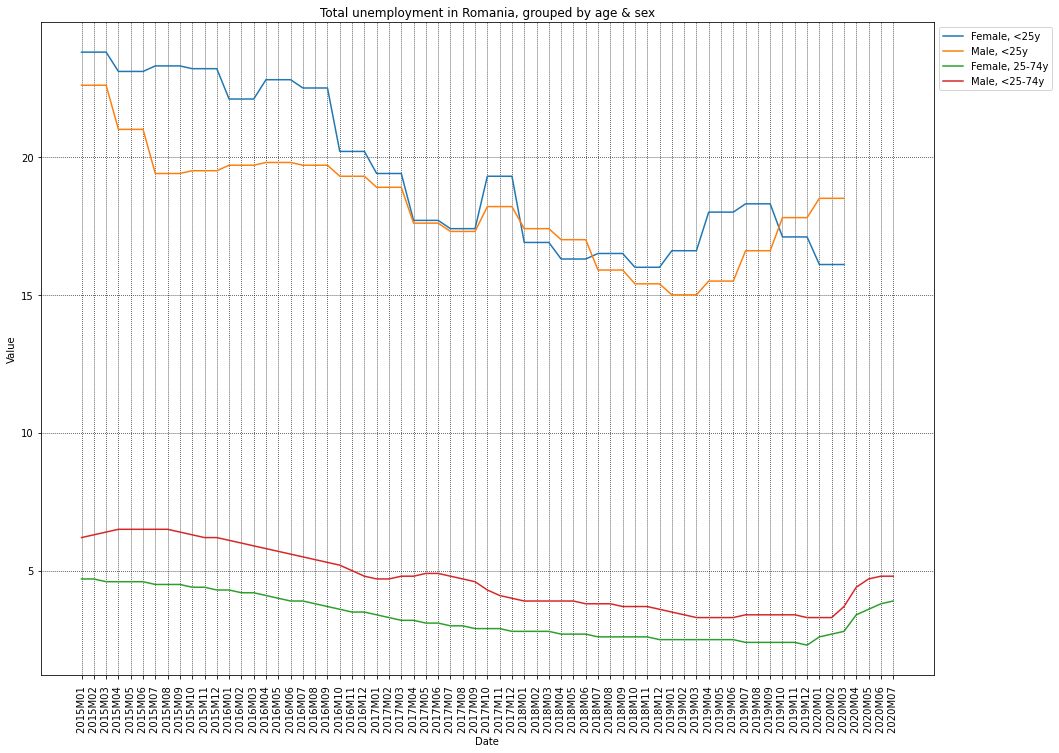

In [41]:
plot_time_variation_age_sex(data_tr_df,country="Romania")

### Animated maps

We introduce as well animated maps for the unemployments in European countries.

In [42]:
import plotly.express as px

def plot_animated_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>unemployment: {row['Value']}%<br>country code: {row['iso']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="C3",
                        hover_name='hover_text',
                        color="Value",
                        animation_frame="Date",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=600, height=600)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="europe")
    fig.show()    

In [43]:
c_df = data_tr_df.loc[(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='F')]
dd_df = dd_df.sort_values(by='Date')
title = 'Percent of unemployed per country<br>Female, under 25 - (hover for details)'
plot_animated_map(dd_df, title)

In [44]:
c_df = data_tr_df.loc[(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='M')]
dd_df = dd_df.sort_values(by='Date')
title = 'Percent of unemployed per country<br>Male, under 25 - (hover for details)'
plot_animated_map(dd_df, title)

In [45]:
c_df = data_tr_df.loc[(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='F')]
dd_df = dd_df.sort_values(by='Date')
title = 'Percent of unemployed per country<br>Female, 25-74 yrs. old - (hover for details)'
plot_animated_map(dd_df, title)

In [46]:
c_df = data_tr_df.loc[(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='M')]
dd_df = dd_df.sort_values(by='Date')
title = 'Percent of unemployed per country<br>Male, 25-74 yrs. old - (hover for details)'
plot_animated_map(dd_df, title)